<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 7 (midnight), 2024 -->

# Project 1 on Machine Learning, deadline October 7 (midnight), 2024
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, University of Oslo, Norway

Date: **September 2**

## Preamble: Note on writing reports, using reference material, AI and other tools

We want you to answer the three different projects by handing in
reports written like a standard scientific/technical report.  The link
at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/ProjectWriting/projectwriting.ipynb>
gives some guidance. See also the grading suggestion at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/EvaluationGrading/EvaluationForm.md>.

Furthermore, at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/ReportExample/>
you can find examples of previous reports. How to write reports will
also be discussed during the various lab sessions. Please do ask us if you are in doubt.

When using codes and material from other  sources, you should refer to these in the bibliography of your report, indicating  wherefrom you for example
got the code, whether this is from the lecture notes, softwares like
Scikit-Learn, TensorFlow, PyTorch or  other sources. These should
always be cited correctly. How to cite some of the libraries is often
indicated from their corresponding GitHub sites or websites, see for example how to cite Scikit-Learn at  <https://scikit-learn.org/dev/about.html>. 

We enocurage you to use tools like
[ChatGPT](https://openai.com/chatgpt/) or similar in writing the report. If you use for example ChatGPT,
please do cite it properly and include (if possible) your questions and answers as an addition to the report. This can
be uploaded to for example your website, GitHub/GitLab or similar as supplemental material.

## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including the Ordinary Least Squares (OLS) method.
In addition to the scientific part, in this course we want also to
give you an experience in writing scientific reports.

**A small recommendation when developing the codes here**. Instead of
jumping on to the two-dimensional function described below, we
recommend to do the code development and testing with a simpler
one-dimensional function, similar to those discussed in the exercises
of weeks 35 and 36. A simple test, as discussed during the lectures the first
three weeks is to set the design matrix equal to the identity
matrix. Then your model should give a mean square error which is exactly equal to zero.
When you are sure that your codes function well, you can then replace
the one-dimensional test function with the two-dimensional **Franke** function
discussed here.

The Franke function serves as a stepping stone towards the analysis of
real topographic data. The latter is the last part of this project.

### Description of two-dimensional function

We will first study how to fit polynomials to a specific
two-dimensional function called [Franke's
function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf).  This
is a function which has been widely used when testing various
interpolation and fitting algorithms. Furthermore, after having
established the model and the method, we will employ resamling
techniques such as cross-validation and/or bootstrap in order to perform a
proper assessment of our models. We will also study in detail the
so-called Bias-Variance trade off.

The Franke function, which is a weighted sum of four exponentials  reads as follows

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function will be defined for $x,y\in [0,1]$.  In a sense, our data are thus scaled to a particular domain for the input values.

Our first step will
be to perform an OLS regression analysis of this function, trying out
a polynomial fit with an $x$ and a $y$ dependence of the form $[x, y,
x^2, y^2, xy, \dots]$. We will also include bootstrap first as a
resampling technique.  After that we will include the cross-validation
technique.

We can
use a uniform distribution to set up the arrays of values for $x$ and
$y$, or as in the example below just a set of fixed values for $x$ and
$y$ with a given step size.  We will fit a function (for example a
polynomial) of $x$ and $y$.  Thereafter we will repeat much of the
same procedure using the Ridge and Lasso regression methods,
introducing thus a dependence on the bias (penalty) $\lambda$.

Finally we are going to use (real) digital terrain data and try to
reproduce these data using the same methods. We will also try to go
beyond the second-order polynomials metioned above and explore 
which polynomial fits the data best.

The Python code for the Franke function is included here (it performs also a three-dimensional plot of it)

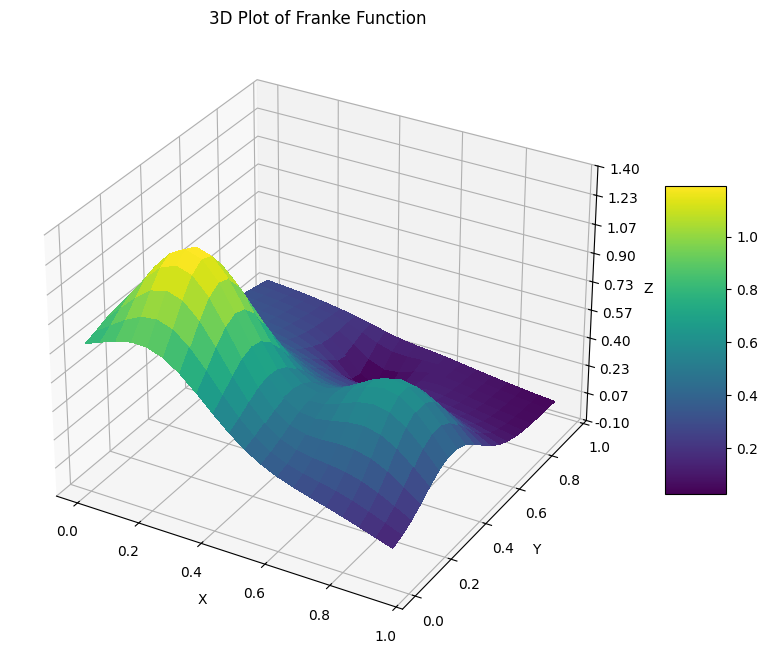

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Make data.
x = np.arange(0, 1, 0.05) # here we dont have noise, we need to add it 
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_title('3D Plot of Franke Function', fontsize=12)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

If you wish to compare your results with other on the Franke function or other popular functions tested with linear regression, see the list in Figure 1 of the article by Cook et al at <https://arxiv.org/abs/2401.11694>.

### Part a) : Ordinary Least Square (OLS) on the Franke function

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $N(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) and perform a standard **ordinary least square regression**
analysis using polynomials in $x$ and $y$ up to fifth order.

Evaluate the mean Squared error (MSE)

$$
MSE(\boldsymbol{y},\tilde{\boldsymbol{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.  If $\tilde{\boldsymbol{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Plot the resulting scores (MSE and R$^2$) as functions of the polynomial degree (here up to polymial degree five).
Plot also the parameters $\beta$ as you increase the order of the polynomial. Comment your results.

Your code has to include a scaling/centering of the data (for example by
subtracting the mean value), and
a split of the data in training and test data. For this exercise you can
either write your own code or use for example the function for
splitting training data provided by the library **Scikit-Learn** (make
sure you have installed it).  This function is called
$train\_test\_split$.  **You should present a critical discussion of why and how you have scaled or not scaled the data**.

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (eventually  also an additional
validation set).  There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.

You can easily reuse the solutions to your exercises from week 35 and week 36.
See also the lecture slides from week 35 and week 36.

On scaling, we recommend reading the following section from the scikit-learn software description, see <https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section>.

### Part b): Adding Ridge regression for  the Franke function

Write your own code for the Ridge method, either using matrix
inversion or the singular value decomposition as done in the previous
exercise. The lecture notes from week 35 and 36 contain more information. Furthermore, the numerical exercise from week 36 is something you can reuse here.

Perform the same analysis as you did in the previous exercise but now for different values of $\lambda$. Compare and
analyze your results with those obtained in part a) with the ordinary least squares method. Study the
dependence on $\lambda$.

### Part c): Adding Lasso for the Franke function

This exercise is essentially a repeat of the previous two ones, but now
with Lasso regression. Write either your own code (difficult and optional) or, in this case,
you can also use the functionalities of **Scikit-Learn** (recommended). Keep in mind that the library **Scikit-Learn** excludes the intercept by default. 
Give a
critical discussion of the three methods and a judgement of which
model fits the data best.

### Without Scaling

In [2]:
# linear algebra
import numpy as np                 

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

import warnings

warnings.filterwarnings("ignore") 

In [3]:
# First we need to add some noise to our function as request from the exercise

np.random.seed(2745)
n = 1000 # --> we add stochastic noise using a normal distrib. N(0,1)
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
z = FrankeFunction(x, y) + 0.1 * np.random.normal(0, 1, n)

In [4]:
def design_matrix(x, y, degree):
    N = len(x)
    l = int((degree + 1) * (degree + 2) / 2)  # Number of terms in poly
    X = np.ones((N, l)) # --> we use ones matrix as starting point
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            X[:, j] = (x**(i-j)) * (y**j)
    return X

def mse_and_r2_sk(y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    return mse, r2

In [5]:
degree = 5
X_manual = design_matrix(x, y, degree)
max_degree = 15
lambdas = np.logspace(-5, 5, max_degree) 

In [6]:
# def mse_and_r2(y_real, y_pred):
#     mse = 1/n * (y_real - y_pred).T @ (y_real - y_pred)
    
#     RSS = (y_real - y_pred).T @ (y_real - y_pred)                   
#     TSS = y_real.T @ y_real - 1/n * (y_real.T @ np.ones(y_real.shape[0])) * (np.ones(y_real.shape[0]).T @ y_real)
#     r2 = 1 - (RSS/TSS)
    
#     print(f'The mean squared error is: {mse.item()} \nThe R2 score is: {r2.item()}') 
#     return mse.item(), r2.item()

# def soft_thresholding(rho, lambda_):
#     if rho < - lambda_:
#         return (rho + lambda_)
#     elif rho > lambda_:
#         return (rho - lambda_)
#     else:
#         return 0

# def lasso_coordinate_descent(X, z, lambd, num_iters=1000, tol=1e-4):
#     m, n = X.shape
#     beta = np.zeros(n)
#     for iteration in range(num_iters):
#         beta_old = beta.copy()
#         for j in range(n):
#             residual = y - X @ beta + X[:, j] * beta[j]
#             rho = X[:, j].T @ residual
#             beta[j] = soft_thresholding(rho, lambd)
#         # if np.sum(np.abs(beta - beta_old)) < tol:
#         #     break
    
#     return beta

In [7]:
# # ---------------------------------- Our Code -----------------------------------
# MSE_train_Lasso_manual = []
# MSE_test_Lasso_manual = []
# R2_train_Lasso_manual = []
# R2_test_Lasso_manual = []

# for l in range(len(lambdas)):
#     beta_Lasso = lasso_coordinate_descent(X_train, z_validation, lambdas[l])
#     intercept_lasso = z_validation - X_train @ beta_Lasso
#     z_train_pred_lasso = X_train @ beta_Lasso + z_validation
#     z_test_pred_lasso = X_train @ beta_Lasso + z_validation

#     MSE_train_Lasso_manual.append(mean_squared_error(z_train, z_train_pred_lasso))
#     MSE_test_Lasso_manual.append(mean_squared_error(z_test, z_test_pred_lasso))
#     R2_train_Lasso_manual.append(r2_score(z_train, z_train_pred_lasso))
#     R2_test_Lasso_manual.append(r2_score(z_test, z_test_pred_lasso))

# # Predictions
# mse_manual, r2_manual = mse_and_r2(z, beta_Lasso)
# print(f"Manual OLS Mean Squared Error (MSE):\t{mse_manual:.5f} \nManual R2:\t{r2_manual:.5f}")
# best_index_ml = np.argmin(MSE_test_Lasso_manual)
# best_alpha_ml = lambdas[best_index_ml]
# min_MSE_ml = MSE_test_Lasso_manual[best_index_ml]
# print(f'\nThe best value of alpha with Scikit-Learn is: {best_alpha_ml:.4f} with a minimum MSE of: {min_MSE_ml:.4f}')

In [8]:
# We create a function to determine the best lambdas to use

def best_lambdas_Lasso(X_train_val, z_train_val, lambdas):
    X_train, X_validation, z_train, z_validation = train_test_split(X_train_val, z_train_val, test_size=0.1, random_state=10)
    MSE_train_Lasso = []
    MSE_test_Lasso = []
    R2_train_Lasso = []
    R2_test_Lasso = []

    for l in range(len(lambdas)):
        model_Lasso = Lasso(alpha = lambdas[l], fit_intercept=False)
        model_Lasso.fit(X_train, z_train)
        z_train_pred_Lasso = model_Lasso.predict(X_train)
        z_test_pred_Lasso = model_Lasso.predict(X_validation)

        mse_train, r2_train = mse_and_r2_sk(z_train, z_train_pred_Lasso)
        mse_validation, r2_validation = mse_and_r2_sk(z_validation, z_test_pred_Lasso)
        
        MSE_train_Lasso.append(mse_train)
        MSE_test_Lasso.append(mse_validation)
        R2_train_Lasso.append(r2_train)
        R2_test_Lasso.append(r2_validation)

    best_index = np.argmin(MSE_test_Lasso)
    best_alpha = lambdas[best_index]
    min_MSE = MSE_test_Lasso[best_index]
    return best_alpha, min_MSE, MSE_train_Lasso, MSE_test_Lasso, R2_train_Lasso, R2_test_Lasso

The best value of alpha with Scikit-Learn is: 0.00027 with a minimum MSE of: 0.06767


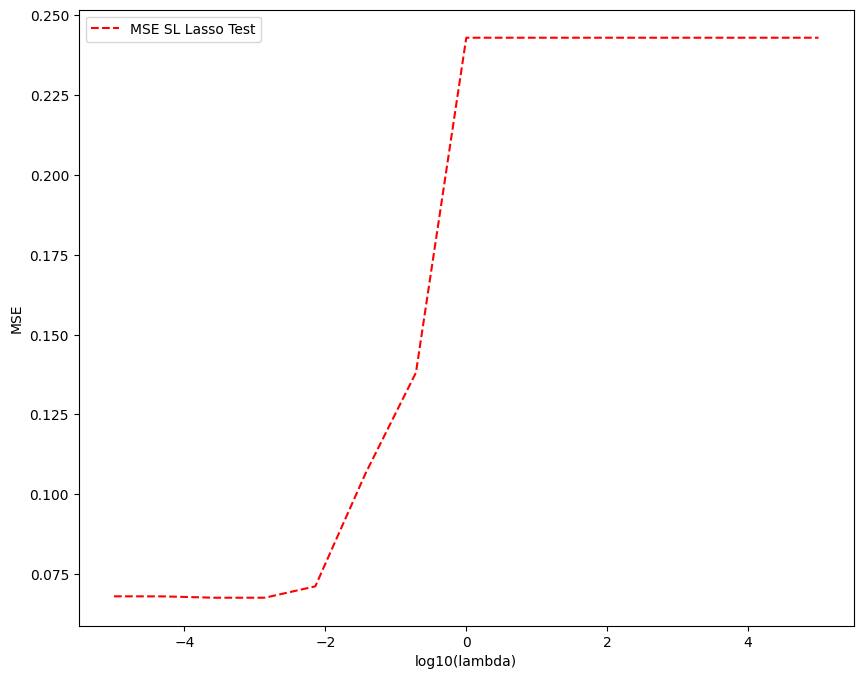

In [9]:
# --------------------------------- Scikit-learn ---------------------------------
X_train_val, X_test, z_train_val, z_test = train_test_split(X_manual, z, test_size=0.1)
best_alpha, min_MSE, MSE_train_Lasso, MSE_test_Lasso, R2_train_Lasso, R2_test_Lasso = best_lambdas_Lasso(X_train_val, z_train_val, lambdas)
print(f'The best value of alpha with Scikit-Learn is: {best_alpha:.5f} with a minimum MSE of: {min_MSE:.5f}')

X = np.column_stack((x, y))
poly = PolynomialFeatures(degree = degree)
X_poly = poly.fit_transform(X)
model_Lasso = Lasso(alpha = best_alpha, fit_intercept=False)
model_Lasso.fit(X_poly, z)
z_pred_sklearn = model_Lasso.predict(X_poly)

# --------------------------------- Plot results ---------------------------------
plt.figure(figsize = (10, 8))
plt.plot(np.log10(lambdas), MSE_test_Lasso, 'r--', label = 'MSE SL Lasso Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

Sklearn Lasso Mean Squared Error (MSE):	0.01937 
Sklearn Lasso R2:			0.77965


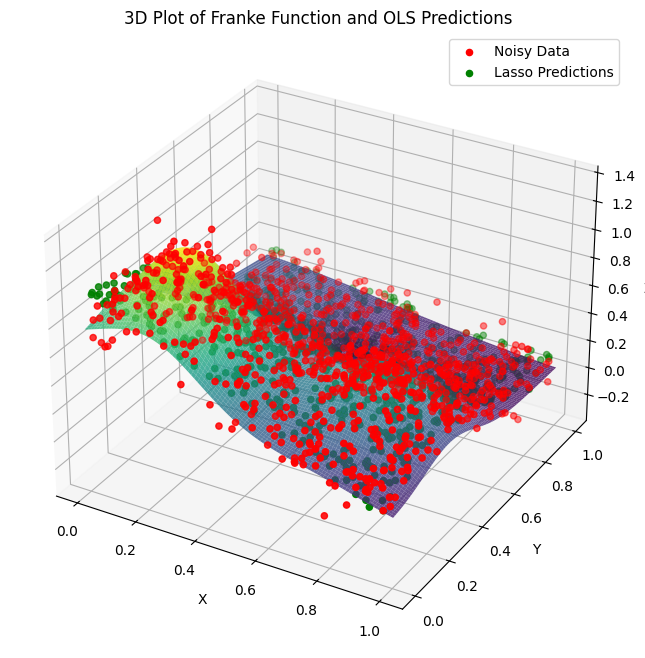

In [10]:
mse_sklearn, r2_sklearn = mse_and_r2_sk(z, z_pred_sklearn)
print(f"Sklearn Lasso Mean Squared Error (MSE):\t{mse_sklearn:.5f} \nSklearn Lasso R2:\t\t\t{r2_sklearn:.5f}")

# --------------------------------- Plot results ---------------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x_surf, y_surf = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
z_surf = FrankeFunction(x_surf, y_surf)
ax.plot_surface(x_surf, y_surf, z_surf, cmap='viridis', alpha=0.8, rstride=1, cstride=1)
ax.scatter(x, y, z, color='r', label='Noisy Data') # --> data from Franke's function with noise
ax.scatter(x, y, z_pred_sklearn, color='g', label='Lasso Predictions') # --> Lasso predictions
ax.set_title('3D Plot of Franke Function and OLS Predictions', fontsize=12)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()

Degree: 1 	 Train MSE: 0.0321 	 Test MSE: 0.5955 	 Train R2: 0.6288 	 Test R2: 0.5955
Degree: 2 	 Train MSE: 0.0256 	 Test MSE: 0.6333 	 Train R2: 0.7032 	 Test R2: 0.6333
Degree: 3 	 Train MSE: 0.0178 	 Test MSE: 0.7510 	 Train R2: 0.7935 	 Test R2: 0.7510
Degree: 4 	 Train MSE: 0.0174 	 Test MSE: 0.7654 	 Train R2: 0.7984 	 Test R2: 0.7654
Degree: 5 	 Train MSE: 0.0174 	 Test MSE: 0.7657 	 Train R2: 0.7984 	 Test R2: 0.7657
Degree: 6 	 Train MSE: 0.0171 	 Test MSE: 0.7688 	 Train R2: 0.8021 	 Test R2: 0.7688
Degree: 7 	 Train MSE: 0.0167 	 Test MSE: 0.7721 	 Train R2: 0.8065 	 Test R2: 0.7721
Degree: 8 	 Train MSE: 0.0164 	 Test MSE: 0.7753 	 Train R2: 0.8104 	 Test R2: 0.7753
Degree: 9 	 Train MSE: 0.0161 	 Test MSE: 0.7783 	 Train R2: 0.8134 	 Test R2: 0.7783
Degree: 10 	 Train MSE: 0.0159 	 Test MSE: 0.7811 	 Train R2: 0.8158 	 Test R2: 0.7811
Degree: 11 	 Train MSE: 0.0158 	 Test MSE: 0.7829 	 Train R2: 0.8171 	 Test R2: 0.7829
Degree: 12 	 Train MSE: 0.0158 	 Test MSE: 0.7836 	 

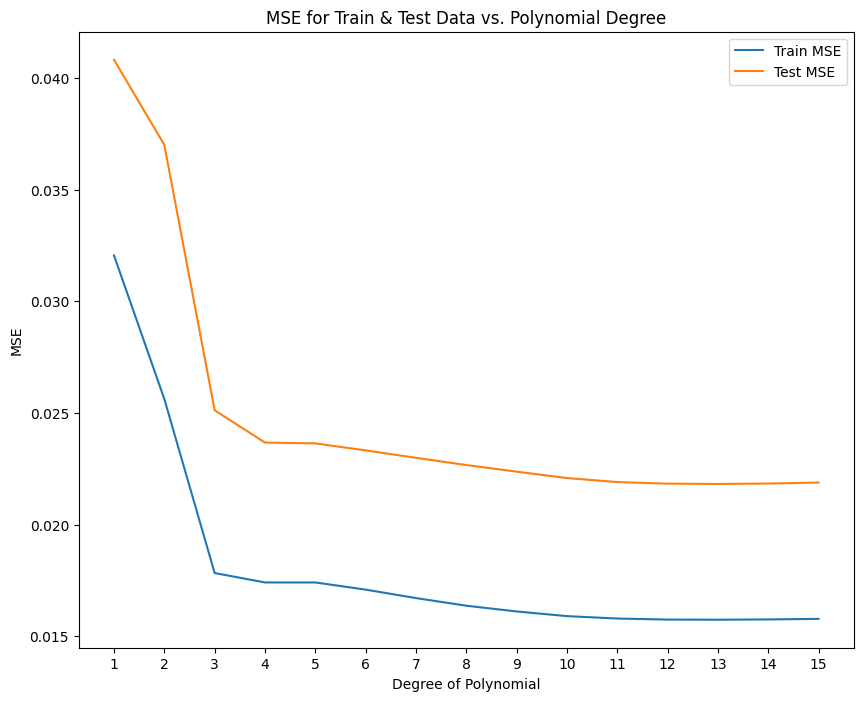

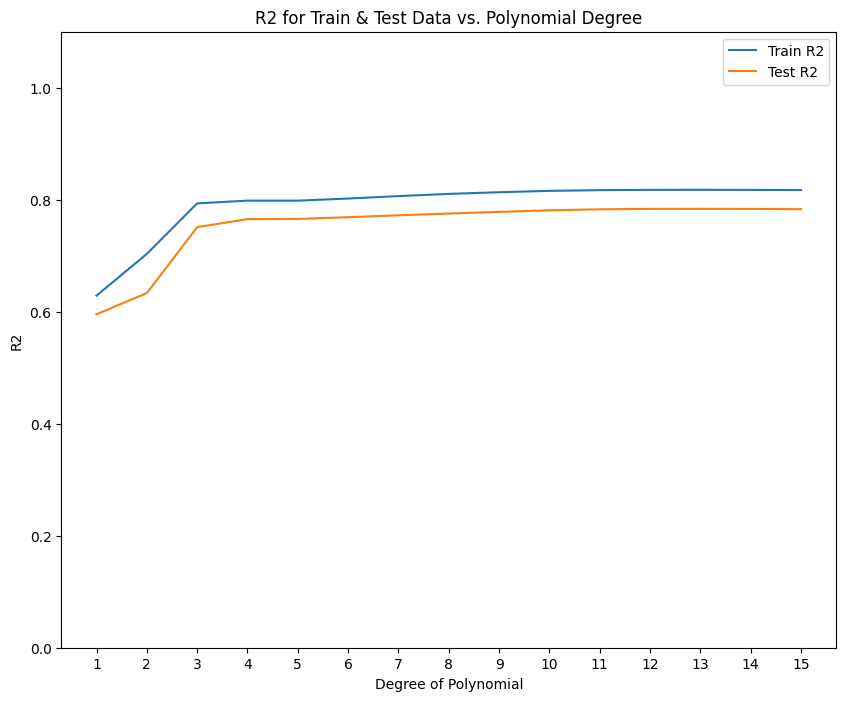

In [11]:
mse_train_values = []
mse_test_values = []
r2_train_values = []
r2_test_values = []

X = np.column_stack((x, y)) # --> this is important, we need to merge x and y
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.1, random_state=10)

# Loop iteration
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    best_alpha, min_MSE, MSE_train_Lasso, MSE_test_Lasso, R2_train__Lasso, R2_test_Lasso = best_lambdas_Lasso(X_train_poly, z_train, lambdas)
    model_Lasso = Lasso(alpha = best_alpha, fit_intercept=False)
    model_Lasso.fit(X_train_poly, z_train)
    
    z_train_pred = model_Lasso.predict(X_train_poly)
    z_test_pred = model_Lasso.predict(X_test_poly)

    mse_train, r2_train = mse_and_r2_sk(z_train, z_train_pred)
    mse_test, r2_test = mse_and_r2_sk(z_test, z_test_pred)
    
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)
    r2_train_values.append(r2_train)
    r2_test_values.append(r2_test)
    
    print(f"Degree: {degree} \t Train MSE: {mse_train_values[degree-1]:.4f} \t Test MSE: {r2_test_values[degree-1]:.4f} \t Train R2: {r2_train_values[degree-1]:.4f} \t Test R2: {r2_test_values[degree-1]:.4f}")


# --------------------------------- Plot results ---------------------------------
# Plotting MSE Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), mse_train_values, label='Train MSE')
plt.plot(range(1, max_degree + 1), mse_test_values, label='Test MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.xticks(ticks=range(1,16))
plt.title('MSE for Train & Test Data vs. Polynomial Degree')
plt.legend()
plt.show()

# Plotting R2 Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), r2_train_values, label='Train R2')
plt.plot(range(1, max_degree + 1), r2_test_values, label='Test R2')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R2')
plt.ylim(0, 1.1)
plt.xticks(ticks=range(1,16))
plt.title('R2 for Train & Test Data vs. Polynomial Degree')
plt.legend()
plt.show()

### Scaling

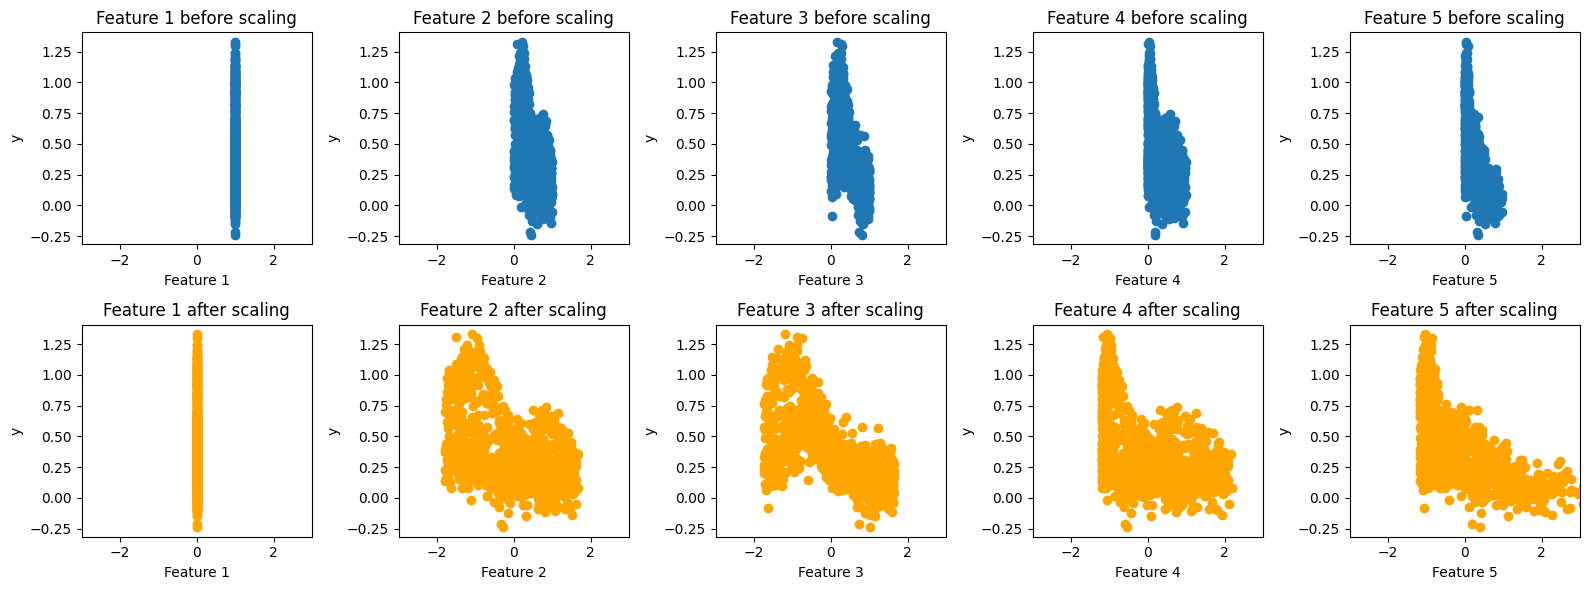

In [12]:
scaler_X = StandardScaler()

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.1, random_state=10)
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_scaled = scaler_X.fit_transform(X_train_poly)
X_test_scaled = scaler_X.transform(X_test_poly)

scaler_z = StandardScaler()
z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1)).ravel()
z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1)).ravel()

# --------------------------------- Plot results ---------------------------------
# Plot before scaling
n_features = 5
plt.figure(figsize=(16, 6))
x_limits = [(-3, 3)] * 5

for i in range(n_features):
    plt.subplot(2, n_features, i + 1)
    plt.scatter(X_train_poly[:, i], z_train, alpha=1)  # Use X_train_poly for polynomial features
    plt.title(f'Feature {i + 1} before scaling')
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('y')
    plt.xlim(x_limits[i])

# Plot after scaling
for i in range(n_features):
    plt.subplot(2, n_features, n_features + i + 1)
    plt.scatter(X_train_scaled[:, i], z_train, alpha=1, color='orange')  # Use scaled features
    plt.title(f'Feature {i + 1} after scaling')
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('y')
    plt.xlim(x_limits[i])

plt.tight_layout()
plt.show()

Train Mean Squared Error: 0.01193 
Train R2:		  0.86365

Test Mean Squared Error: 0.01468 
Test R2:		 0.83910


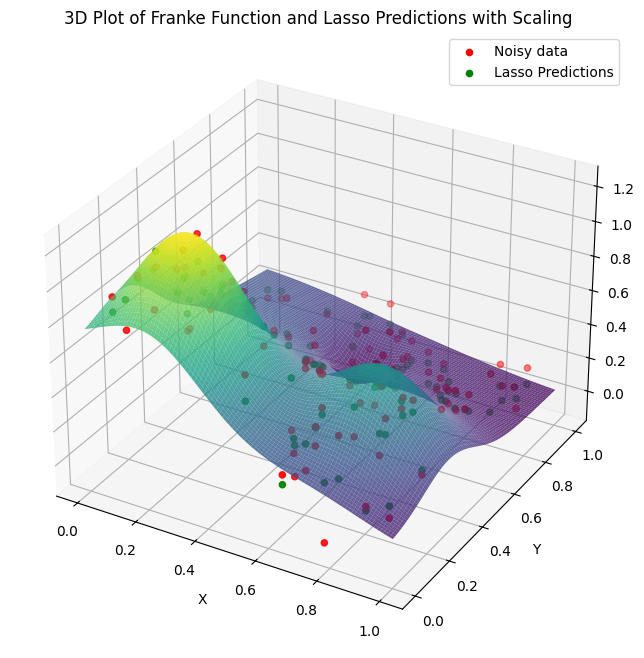

In [13]:
X = np.column_stack((x, y))  # remember that z = f(x,y)

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.1, random_state=42)

# Scaling only on X (xy)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

poly = PolynomialFeatures(degree = 5)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Scaling on z
scaler_z = StandardScaler()
z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1)).ravel()
z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1)).ravel()

# Model
best_alpha, min_MSE, MSE_train_Lasso, MSE_test_Lasso, R2_train__Lasso, R2_test_Lasso = best_lambdas_Lasso(X_train_poly, z_train_scaled, lambdas)
model_Lasso = Lasso(alpha = best_alpha, fit_intercept=False)
model_Lasso.fit(X_train_poly, z_train_scaled)

z_train_pred_scaled = model_Lasso.predict(X_train_poly)
z_test_pred_scaled = model_Lasso.predict(X_test_poly)

# Re-scaling
z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1)).ravel()
z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1)).ravel()

# eval
train_mse, train_r2 = mse_and_r2_sk(z_train, z_train_pred)
test_mse, test_r2 = mse_and_r2_sk(z_test, z_test_pred)
print(f"Train Mean Squared Error: {train_mse:.5f} \nTrain R2:\t\t  {train_r2:.5f}")
print(f"\nTest Mean Squared Error: {test_mse:.5f} \nTest R2:\t\t {test_r2:.5f}")


# --------------------------------- Plot results ---------------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x_surf, y_surf = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
z_surf = FrankeFunction(x_surf, y_surf)
ax.plot_surface(x_surf, y_surf, z_surf, cmap='viridis', alpha=0.8, rstride=1, cstride=1)
ax.scatter(X_test[:, 0], X_test[:, 1], z_test, color='r', label='Noisy data')
ax.scatter(X_test[:, 0], X_test[:, 1], z_test_pred, color='g', label='Lasso Predictions')
ax.set_title('3D Plot of Franke Function and Lasso Predictions with Scaling', fontsize=12)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()

Degree: 1 	 Train MSE: 0.0322 	 Test MSE: 0.5924 	 Train R2: 0.6272 	 Test R2: 0.5924
Degree: 2 	 Train MSE: 0.0257 	 Test MSE: 0.6341 	 Train R2: 0.7027 	 Test R2: 0.6341
Degree: 3 	 Train MSE: 0.0169 	 Test MSE: 0.7782 	 Train R2: 0.8042 	 Test R2: 0.7782
Degree: 4 	 Train MSE: 0.0141 	 Test MSE: 0.8394 	 Train R2: 0.8364 	 Test R2: 0.8394
Degree: 5 	 Train MSE: 0.0120 	 Test MSE: 0.8578 	 Train R2: 0.8608 	 Test R2: 0.8578
Degree: 6 	 Train MSE: 0.0112 	 Test MSE: 0.8689 	 Train R2: 0.8697 	 Test R2: 0.8689
Degree: 7 	 Train MSE: 0.0108 	 Test MSE: 0.8657 	 Train R2: 0.8755 	 Test R2: 0.8657
Degree: 8 	 Train MSE: 0.0108 	 Test MSE: 0.8656 	 Train R2: 0.8752 	 Test R2: 0.8656
Degree: 9 	 Train MSE: 0.0105 	 Test MSE: 0.8626 	 Train R2: 0.8785 	 Test R2: 0.8626
Degree: 10 	 Train MSE: 0.0104 	 Test MSE: 0.8631 	 Train R2: 0.8794 	 Test R2: 0.8631
Degree: 11 	 Train MSE: 0.0104 	 Test MSE: 0.8625 	 Train R2: 0.8791 	 Test R2: 0.8625
Degree: 12 	 Train MSE: 0.0104 	 Test MSE: 0.8621 	 

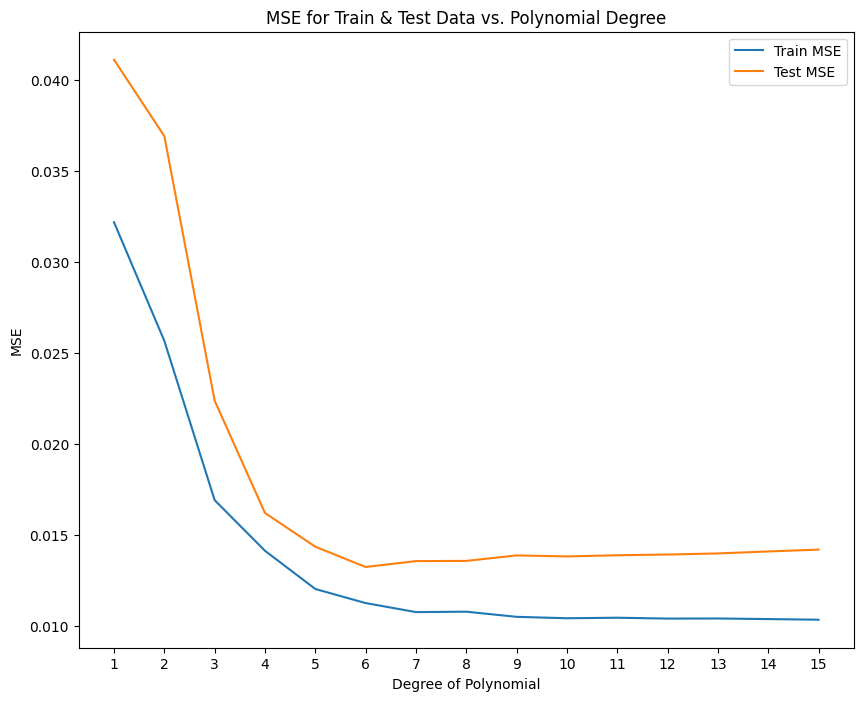

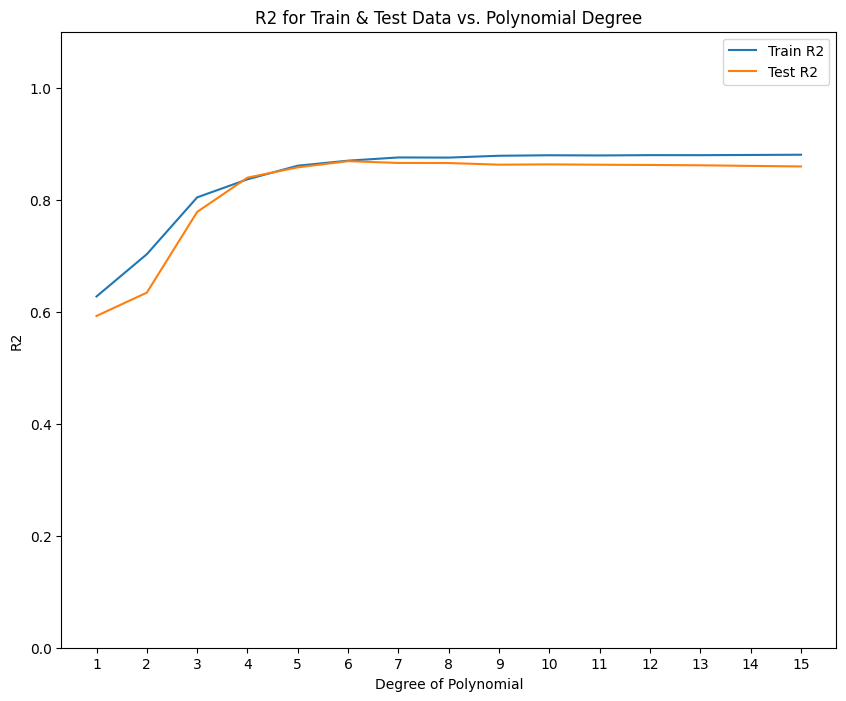

In [14]:
mse_train_values_Lasso = []
mse_test_values_Lasso = []
r2_train_values_Lasso = []
r2_test_values_Lasso = []

X = np.column_stack((x, y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.1, random_state=10)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling on z
scaler_z = StandardScaler()
z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1)).ravel()
z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1)).ravel()

# Loop iteration
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Model
    best_alpha, min_MSE, MSE_train_Lasso, MSE_test_Lasso, R2_train__Lasso, R2_test_Lasso = best_lambdas_Lasso(X_train_poly, z_train_scaled, lambdas)
    model_Lasso = Lasso(alpha = best_alpha, fit_intercept=False)
    model_Lasso.fit(X_train_poly, z_train_scaled)

    z_train_pred_scaled = model_Lasso.predict(X_train_poly)
    z_test_pred_scaled = model_Lasso.predict(X_test_poly)

    # Re-scaling
    z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1)).ravel()
    z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1)).ravel()

    mse_train, r2_train = mse_and_r2_sk(z_train, z_train_pred)
    mse_test, r2_test = mse_and_r2_sk(z_test, z_test_pred)
    
    mse_train_values_Lasso.append(mse_train)
    mse_test_values_Lasso.append(mse_test)
    r2_train_values_Lasso.append(r2_train)
    r2_test_values_Lasso.append(r2_test)
    
    print(f"Degree: {degree} \t Train MSE: {mse_train_values_Lasso[degree-1]:.4f} \t Test MSE: {r2_test_values_Lasso[degree-1]:.4f} \t Train R2: {r2_train_values_Lasso[degree-1]:.4f} \t Test R2: {r2_test_values_Lasso[degree-1]:.4f}")

# --------------------------------- Plot results ---------------------------------
# Plotting MSE Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), mse_train_values_Lasso, label='Train MSE')
plt.plot(range(1, max_degree + 1), mse_test_values_Lasso, label='Test MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.xticks(ticks=range(1, max_degree + 1))
plt.title('MSE for Train & Test Data vs. Polynomial Degree')
plt.legend()
plt.show()

# Plotting R2 Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), r2_train_values_Lasso, label='Train R2')
plt.plot(range(1, max_degree + 1), r2_test_values_Lasso, label='Test R2')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R2')
plt.ylim(0, 1.1)
plt.xticks(ticks=range(1, max_degree + 1))
plt.title('R2 for Train & Test Data vs. Polynomial Degree')
plt.legend()
plt.show()

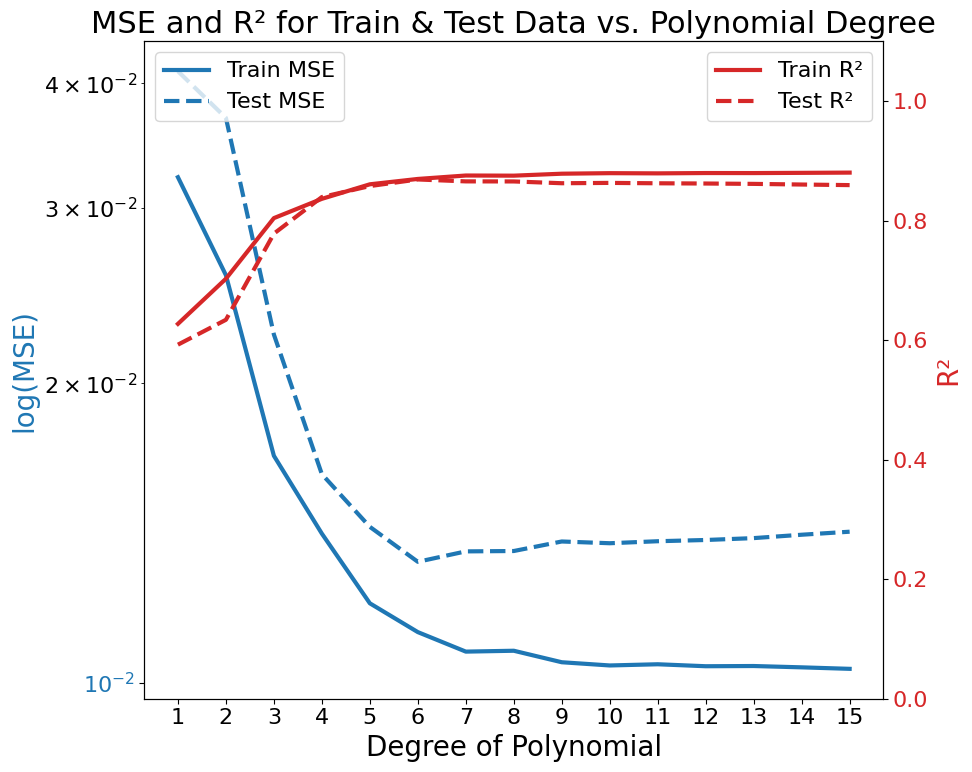

In [15]:
plt.rcParams.update({
    "font.size": 16,             
    "axes.labelsize": 20,        
    "xtick.labelsize": 16,       
    "ytick.labelsize": 16,       
    "legend.fontsize": 16,       
    "lines.linewidth": 3,        
})

fig, ax1 = plt.subplots(figsize=(10, 8))

color = 'tab:blue'
ax1.set_xlabel('Degree of Polynomial')
ax1.set_ylabel('log(MSE)', color=color)
ax1.plot(range(1, max_degree + 1), mse_train_values_Lasso, label='Train MSE', color=color)
ax1.plot(range(1, max_degree + 1), mse_test_values_Lasso, label='Test MSE', linestyle='--', color=color)
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(1, max_degree + 1))

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R²', color=color)
ax2.plot(range(1, max_degree + 1), r2_train_values_Lasso, label='Train R²', color=color)
ax2.plot(range(1, max_degree + 1), r2_test_values_Lasso, label='Test R²', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1.1)

plt.title('MSE and R² for Train & Test Data vs. Polynomial Degree', fontsize=22)
fig.tight_layout() 
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# plt.savefig("mse_r2_plot_Lasso.pdf", format='pdf', bbox_inches='tight')
plt.show()

## Last part

In [21]:
from sklearn.linear_model import Ridge


def best_lambdas_Ridge(X_train_val, z_train_val, lambdas):
    X_train, X_validation, z_train, z_validation = train_test_split(X_train_val, z_train_val, test_size=0.1, random_state=10)
    MSE_train_Ridge = []
    MSE_test_Ridge = []
    R2_train_Ridge = []
    R2_test_Ridge = []

    for l in range(len(lambdas)):
        model_Ridge = Ridge(lambdas[l], fit_intercept=False)
        model_Ridge.fit(X_train, z_train)
        z_train_pred_Ridge = model_Ridge.predict(X_train)
        z_test_pred_Ridge = model_Ridge.predict(X_validation)

        mse_train, r2_train = mse_and_r2_sk(z_train, z_train_pred_Ridge)
        mse_validation, r2_validation = mse_and_r2_sk(z_validation, z_test_pred_Ridge)
        
        MSE_train_Ridge.append(mse_train)
        MSE_test_Ridge.append(mse_validation)
        R2_train_Ridge.append(r2_train)
        R2_test_Ridge.append(r2_validation)

    best_index = np.argmin(MSE_test_Ridge)
    best_alpha_Ridge = lambdas[best_index]
    min_MSE = MSE_test_Ridge[best_index]
    return best_alpha_Ridge, min_MSE, MSE_train_Ridge, MSE_test_Ridge, R2_train_Ridge, R2_test_Ridge

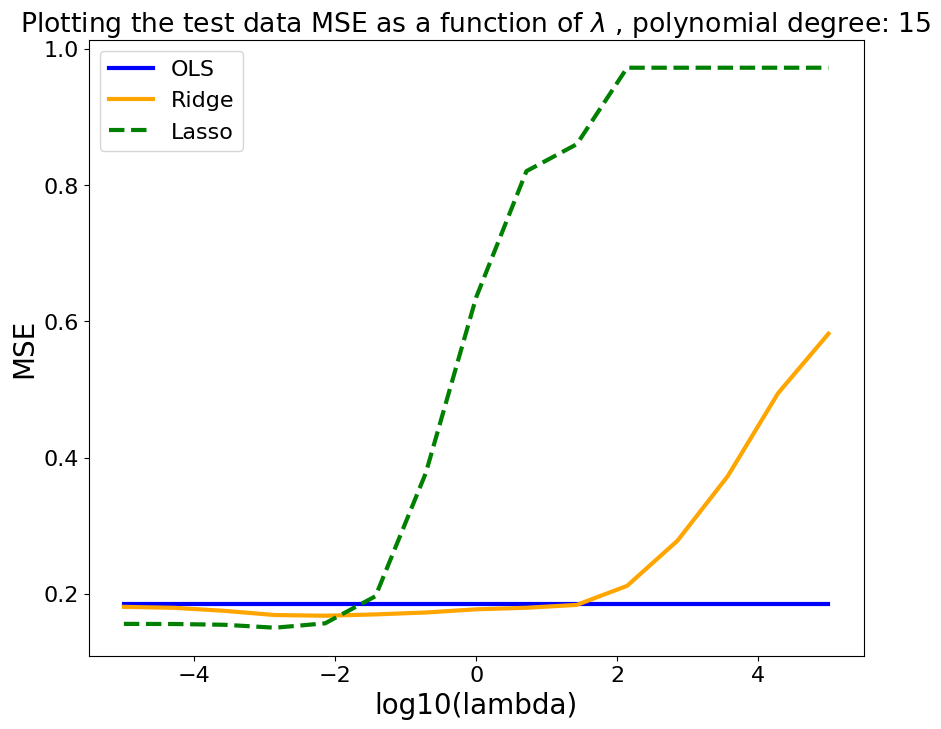

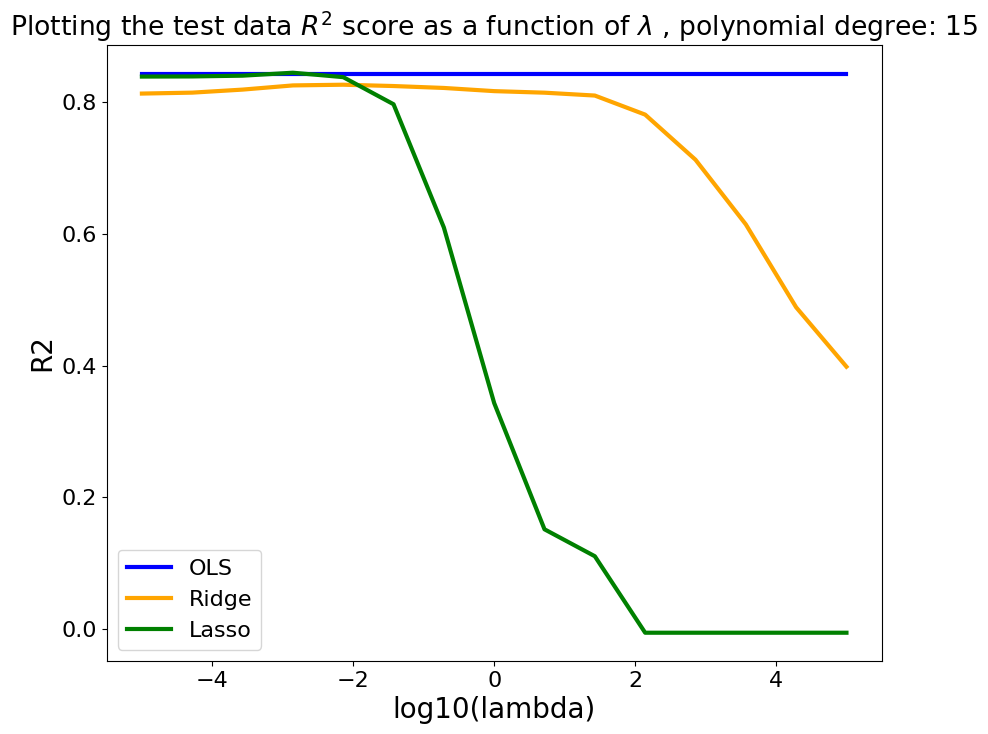

In [23]:
degree = 15

X = np.column_stack((x, y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.1, random_state=10)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling on z
scaler_z = StandardScaler()
z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1)).ravel()
z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1)).ravel()

poly = PolynomialFeatures(degree = degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
# --------------------------------- OLS ---------------------------------
model = LinearRegression()
model.fit(X_train_poly, z_train_scaled)
# Predictions
z_train_pred = model.predict(X_train_poly)
z_test_pred = model.predict(X_test_poly)

MSE_train_OLS = mean_squared_error(z_train_scaled, z_train_pred)
MSE_test_OLS = mean_squared_error(z_test_scaled, z_test_pred)
R2_train_OLS = r2_score(z_train_scaled, z_train_pred)
R2_test_OLS = r2_score(z_test_scaled, z_test_pred)

# --------------------------------- Ridge ---------------------------------
best_alpha_Ridge, min_MSE, MSE_train_Ridge, MSE_test_Ridge, R2_train_Ridge, R2_test_Ridge = best_lambdas_Ridge(X_train_poly, z_train_scaled, lambdas)

# --------------------------------- Lasso ---------------------------------
best_alpha, min_MSE, MSE_train_Lasso, MSE_test_Lasso, R2_train__Lasso, R2_test_Lasso = best_lambdas_Lasso(X_train_poly, z_train_scaled, lambdas)

# --------------------------------- Plot results ---------------------------------
# Plotting MSE Train
plt.figure(figsize=(10, 8))
plt.plot(np.log10(lambdas), np.ones(len(lambdas)) * MSE_test_OLS, 'b-', label='OLS')
plt.plot(np.log10(lambdas), MSE_test_Ridge, 'orange', label='Ridge')
plt.plot(np.log10(lambdas), MSE_test_Lasso, 'g--', label = 'Lasso')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.title("Plotting the test data MSE as a function of " + r'$\lambda$' + f" , polynomial degree: {max_degree}")
plt.legend()
plt.show()

# Plotting R2 Test
plt.figure(figsize=(10, 8))
plt.plot(np.log10(lambdas), np.ones(len(lambdas)) * R2_test_OLS, 'b-', label='OLS')
plt.plot(np.log10(lambdas), R2_test_Ridge, 'orange', label='Ridge')
plt.plot(np.log10(lambdas), R2_test_Lasso, 'g-', label='Lasso')
plt.xlabel('log10(lambda)')
plt.ylabel('R2')
plt.title("Plotting the test data " + r"$R^2$" + " score as a function of " + r'$\lambda$' + f" , polynomial degree: {max_degree}")
plt.legend()
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

max_degree = 15

# Initializing arrays
mse_train_values_OLS = []
mse_test_values_OLS = []
r2_train_values_OLS = []
r2_test_values_OLS = []

# Split
X = np.column_stack((x, y)) # --> this is important, we need to merge x and y
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=10)

# Loop iteration
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    mse_train_values_OLS.append(mse_train)
    mse_test_values_OLS.append(mse_test)
    
    r2_train_values_OLS.append(r2_train)
    r2_test_values_OLS.append(r2_test)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Plotting MSE Test
axes[0].plot(range(1, max_degree + 1), mse_test_values, 'b-', label='OLS')
# axes[0].plt.plot(range(1, max_degree + 1), , 'orange', label='Ridge')
axes[0].plot(range(1, max_degree + 1), mse_test_values_Lasso, 'g-', label='Lasso')
axes[0].set_xlabel('Degree of Polynomial')
axes[0].set_ylabel('MSE')
axes[0].set_xticks(range(1, max_degree + 1))
axes[0].set_title("plotting the test data MSE as a function of " + r'$\lambda$' + f" , polynomial degree: {max_degree}")
axes[0].legend()

# Plotting R2 Test
axes[1].plot(range(1, max_degree + 1), r2_test_values_OLS, 'b-', label='OLS')
# axes[1].plt.plot(range(1, max_degree + 1), , 'orange', label='Ridge')
axes[1].plot(range(1, max_degree + 1), r2_test_values_Lasso, 'g-', label='Lasso')
axes[1].set_xlabel('Degree of Polynomial')
axes[1].set_ylabel('R2')
axes[1].set_ylim(0, 1.1)
axes[1].set_xticks(range(1, max_degree + 1))
axes[1].set_title("plotting the test data R2 score as a function of " + r'$\lambda$' + f" , polynomial degree: {max_degree}")
axes[1].legend()

plt.tight_layout()
plt.show()

### Part e): Bias-variance trade-off and resampling techniques

Our aim here is to study the bias-variance trade-off by implementing the **bootstrap** resampling technique.
**We will only use the simpler ordinary least squares here**.

With a code which does OLS and includes resampling techniques, 
we will now discuss the bias-variance trade-off in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks and basically all Machine Learning algorithms. 

Before you perform an analysis of the bias-variance trade-off on your test data, make
first a figure similar to Fig. 2.11 of Hastie, Tibshirani, and
Friedman. Figure 2.11 of this reference displays only the test and training MSEs. The test MSE can be used to 
indicate possible regions of low/high bias and variance. You will most likely not get an
equally smooth curve!

With this result we move on to the bias-variance trade-off analysis.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

As in part d), we assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the mean
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite  this in terms of a term which contains the variance of the model itself (the so-called variance term), a
term which measures the deviation from the true data and the mean value of the model (the bias term) and finally the variance of the noise.
That is, show that

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$

with

$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$

and

$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

The answer to this exercise should be included in the theory part of the report.  This exercise is also part of the weekly exercises of week 38.
Explain what the terms mean and discuss their interpretations.

Perform then a bias-variance analysis of the Franke function by
studying the MSE value as function of the complexity of your model.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.
You can follow the code example in the jupyter-book at <https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff>.

In [ ]:
np.random.seed(2745)
n = 5000 # --> we add stochastic noise using a normal distrib. N(0,1)
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
z = FrankeFunction(x, y) + 0.1 * np.random.normal(0, 1, n)
z = z.ravel().reshape(-1, 1)

n_boostraps = 100
max_degree = 25
lambdas = np.logspace(-5, 5, max_degree) 

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


MSE_train_values = np.zeros(max_degree)
MSE_test_values = np.zeros(max_degree)
error = np.zeros(max_degree)
bias = np.zeros(max_degree)
variance = np.zeros(max_degree)

X = np.column_stack((x, y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=10)

for degree in range(1, max_degree + 1):
    model = make_pipeline(PolynomialFeatures(degree = degree), LinearRegression(fit_intercept = False))
    z_train_pred = np.empty((z_train.shape[0], n_boostraps))
    z_test_pred = np.empty((z_test.shape[0], n_boostraps))

    for j in range(n_boostraps):
        new_x_, new_z_ = resample(X_train, z_train)
        model.fit(new_x_, new_z_)
        z_train_pred[:, j] = model.predict(X_train).ravel()
        z_test_pred[:, j] = model.predict(X_test).ravel()

    error[degree - 1] = np.mean(np.mean((z_test - z_test_pred)**2, axis=1, keepdims=True))
    bias[degree - 1] = np.mean((z_test - np.mean(z_test_pred, axis=1, keepdims=True))**2)
    variance[degree - 1] = np.mean(np.var(z_test_pred, axis=1, keepdims=True))
    
    MSE_train_values[degree - 1] = MSE(z_train, z_train_pred)
    MSE_test_values[degree - 1] = MSE(z_test, z_test_pred)


plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), MSE_train_values, label='Train MSE')
plt.plot(range(1, max_degree + 1), MSE_test_values, label='Test MSE')
plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.yscale('log')
plt.title(f'MSE for Train & Test Data in {max_degree} Polynomial Degree')
plt.legend()

plt.figure(figsize=(10, 8))
plt.xlabel("degree of the polynom")
plt.plot(range(1, max_degree + 1), error, 'b', label='Error')
plt.plot(range(1, max_degree + 1), variance, 'g', label='Variance')
plt.plot(range(1, max_degree + 1), bias, 'y', label='Bias')
plt.yscale('log')
plt.legend()

plt.show()